This contains a bunch of tests to make sure the code is running as expected

In [74]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../")
import matplotlib.pylab as plt
import batchProcess as bp
import numpy as np
import pytraj as pt

SHOULD PULL INTO BU
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
#case='square'
#case='cylinder'
path="../"
case='crowder'
case='test'
case='expt'
#path="/home/pkh-lab-shared/migration/231103/"
#case='nocrowder_particleRad1.000000_01'
traj = bp.LoadTraj(path+case)


Loaded ../expt.dcd


In [76]:
print(np.min(traj.xyz[0,:,0]))
print(np.max(traj.xyz[0,:,0]))

-990.6173706054688
993.4637451171875


2 29153.250285725142
[63072.23110924 60305.45261805 29153.25028573 ... 21206.86252501
  1763.87775932     0.        ]
44306.87743623927


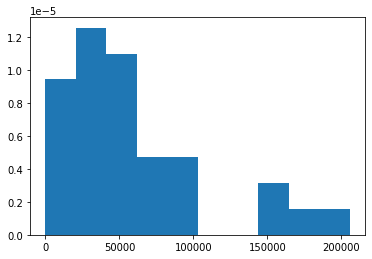

In [77]:
i=2
s = traj.xyz[0,i,0:2]
e = traj.xyz[-1,i,0:2]
#print(s)

sqd = np.sum( (e-s)**2)
print(i,sqd)


s = traj.xyz[0,:,0:2]
e = traj.xyz[-1,:,0:2]
#print(s)

sqd = np.sum( (e-s)**2,axis=1 )
print(sqd)

plt.hist(sqd,density=True)
print(np.median(sqd))

559.9290733264543


Text(0.5, 0, 't [min]')

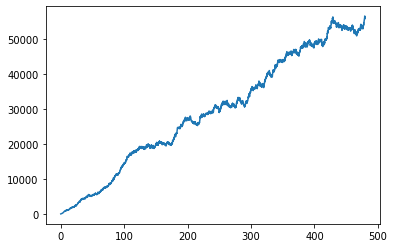

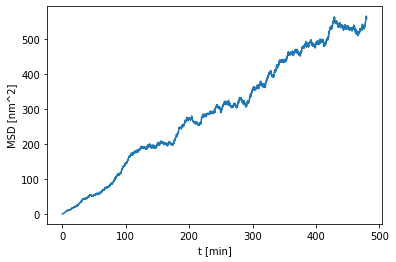

In [82]:
# check against pytraj rmsd 
frRate = 0.10 # min/fr
frames = np.arange(np.shape(traj)[0])*frRate
rmsdAll = pt.rmsd(traj, mask='@RC', ref=0)

msdAll = rmsdAll**2
print(msdAll[-1]*AA_to_nmnm)
plt.figure()
plt.plot(frames,msdAll)
plt.figure()
AA_to_nmnm = 1e-2
plt.plot(frames,msdAll*AA_to_nmnm,label="MSD_nm^2")
plt.ylabel("MSD [nm^2]")
plt.xlabel("t [min]")





In [239]:
Ang_to_nm =  0.1 # PDB/DCD in anbstroms, default unit in openmm is nanometer
xs = traj.xyz[0:,:,0]*Ang_to_nm 
ys = traj.xyz[0:,:,1]*Ang_to_nm 
zs = traj.xyz[0:,:,2]*Ang_to_nm 
nSteps = np.shape(xs)[0]
print(nSteps, "steps")

1000 steps


Did we move? 

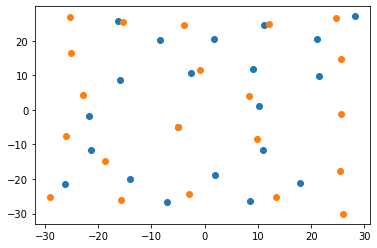

In [240]:
import numpy as np
nparticles = np.shape(xs[0,:])[0]
plt.scatter(xs[0,:],ys[0,:],label='start')
steps=-2
plt.scatter(xs[steps,:],ys[steps,:],label='final')
#plt.scatter(xs[-2,:],ys[-2,:],s=500,edgecolor='red',facecolor='white',label='final')


### How close to the crowder do particles get? 
Done to check what the particle radii are

* Set particles/crowder to [+1,0.1,10], [-1,1.,10]
* Verified that if particleRad=1 # [nM] 

particle=0.1, crowder=1. --> apparentDist=0.5
particle=0.1, crowder=2. --> apparentDist=1.1
particle=0.1, crowder=10. --> apparentDist=5.5
particle=10, crowder=25. --> apparentDist=16 (bimodal) 

Note: the distance won't exactly be 1/2(crowder+particle) but will be close dependent on charge etc


apparentDist 20.100000
minDist 144.000000


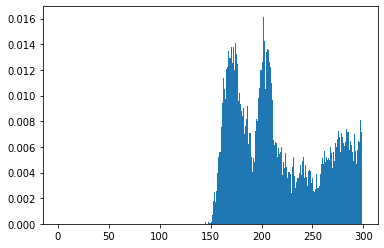

In [241]:
# doesn't seem to work  solvent_mask='@RC', solute_mask='@RC', bin_spacing=1., maximum=100.)
# this seems inefficient 
solventMol = 20
solute=solventMol+1
ar =np.zeros([solventMol,nSteps])
for i in range(solventMol):
    soluteTag=":%d"%solute
    solventTag=":%d"%(i+1)
    tag = soluteTag+" "+solventTag
    ar[i,]=pt.distance(traj,tag)
    
    
    
allPts = np.ndarray.flatten(ar)
c,b,d=plt.hist(allPts,bins=np.arange(300),density=True)
binMax = np.argmax(c)
minBinIdx=np.argwhere(c>1e-4)[0]
minDist_nm = b[minBinIdx]
#minDist_nm = np.min(b[c>1e-3])*Ang_to_nm 
apparentDist_nm = (b[binMax])*Ang_to_nm 
print("apparentDist %f"%apparentDist_nm)
print("minDist %f"%minDist_nm)

Do cells get attracted to wall (need to enable chemotaxis)

-5.568009185791016
-27.809017944335938
[27.96173401 -5.41211166 16.82593536 ... 50.00029297 50.0008728
 50.00091858]
29 ts 9752


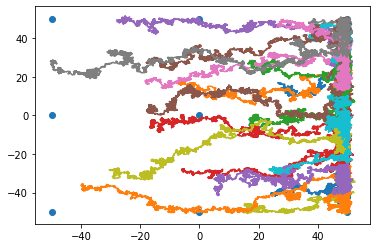

In [343]:
j= 3 # particle
print(xs[0,j])
print(ys[0,j])
print(xs[0,:])
#plt.scatter(xs[0,:],ys[0,:])
plt.scatter(xs[1,20:30],ys[1,20:30])
equil=1
nts = np.shape(xs[:,0])[0]
print(nparticles,"ts",nts)
for i in range(nparticles):
  plt.plot(xs[equil:-1,i],ys[equil:-1,i],label=i)
#plt.legend(loc=0)

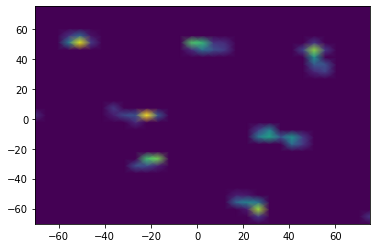

In [135]:
equil=10
xsf=np.ndarray.flatten(xs[equil:,0:20]) # to skip crowders
ysf=np.ndarray.flatten(ys[equil:,0:20]) # to skip crowders
ranges = [[-75, 75], [-75, 75]]
a,xe,ye=np.histogram2d(xsf,ysf,bins=31,range=ranges)

# for gouraud shading
X, Y = np.meshgrid(xe[1:], ye[1:])
plt.pcolormesh(X,Y,np.sqrt(a.T),shading="gouraud")#,cmap='bwr')

Check that z-displacements are small (due to harmonic restraint) 

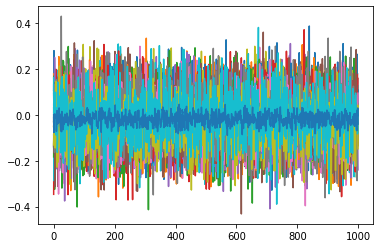

In [136]:
#for i in range(nparticles):
#  print(i,"%5.2f"%zs[5,i])
    
i=0
#if 10:
for i in range(nparticles):    
  plt.plot(zs[:,i])


In [103]:
def asdf(ar):
    di = ar[-1,:]-ar[0,:]
    mdi = np.mean(di)
    mxdi = np.max(di)-np.min(di)
    print(mdi,mxdi)
print("x")
asdf(xs)

print("z")
asdf(zs)

x
-5.155203805650983 131.94354343414307
z
-0.008643601808164798 0.9670909881591798


(array([[ 0.,  5., 61., ..., 46.,  7.,  1.],
        [ 0., 20., 59., ..., 31.,  4.,  0.],
        [ 2., 13., 70., ..., 20.,  1.,  0.],
        ...,
        [ 0., 11., 85., ..., 14.,  1.,  0.],
        [ 1.,  8., 42., ..., 40.,  5.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([-0.43165079, -0.3455465 , -0.25944221, ...,  0.25718355,
         0.34328784,  0.42939213]),
 <a list of 21 BarContainer objects>)

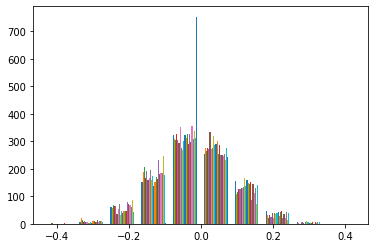

In [137]:
plt.hist(zs)